# Project Desription
<u>**PROBLEM STATEMENT**</u> <i>(according to the data provider on Kaggle)</i>     

"A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -  

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.  
* A sizeable department has to be maintained, for the purposes of recruiting new talent.  
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.  

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away."  

<u>**GOAL OF THE PROJECT**</u>    

We are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.  

<u>**DATA SOURCE**</u>  

* FROM Kaggle - https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study



# Importing libraries
**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [0]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Mounting the drive, to access the data.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%ls

drive/  sample_data/


In [8]:
%cd /content/drive/My Drive/Github_projects/HR_analytics_project

/content/drive/My Drive/Github_projects/HR_analytics_project


# Loading the data : 

The data that we have for this project is as follows :
(for the features see the included data dictionary).

* **employee_survey_data** - This file conatins the survey results of the employees on the following features.
* **general_data** - This file contain general data about employees.
* **in_time** - This file contains employee login time details.
* **out_time** - This file contains employees logout time details.
* **manager_survey_data** - This file contains employees feedback survey about their managers.

In [0]:
employee_survey_data = pd.read_csv('data_files/employee_survey_data.csv')
general_data = pd.read_csv('data_files/general_data.csv')
in_time = pd.read_csv('data_files/in_time.csv')
out_time = pd.read_csv('data_files/out_time.csv')
manager_survey_data = pd.read_csv('data_files/manager_survey_data.csv')

In [10]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [11]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [12]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,...,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,...,2015-10-23 10:03:33,2015-10-26 09:51:07,2015-10-27 09:25:10,2015-10-28 09:50:30,2015-10-29 09:50:22,2015-10-30 09:51:07,2015-11-02 10:01:58,2015-11-03 10:28:53,2015-11-04 09:47:00,2015-11-05 10:24:57,2015-11-06 10:15:27,NaN,NaN,NaN,2015-11-12 10:02:34,2015-11-13 09:29:49,2015-11-16 10:16:02,2015-11-17 09:57:23,2015-11-18 10:13:24,2015-11-19 09:46:48,2015-11-20 10:09:35,2015-11-23 09:54:17,2015-11-24 10:02:07,2015-11-25 10:01:51,2015-11-26 10:18:45,2015-11-27 10:24:49,2015-11-30 10:04:24,2015-12-01 09:31:27,2015-12-02 09:57:52,2015-12-03 10:05:55,2015-12-04 09:55:09,2015-12-07 09:28:15,2015-12-08 09:54:56,2015-12-09 09:51:52,2015-12-10 09:40:25,2015-12-11 09:46:49,2015-12-14 10:03:33,NaN,2015-12-16 10:21:19,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,2015-01-15 09:37:57,2015-01-16 09:57:18,2015-01-19 10:23:43,2015-01-20 09:29:03,2015-01-21 09:46:45,2015-01-22 10:03:51,2015-01-23 09:20:06,NaN,2015-01-27 10:07:48,2015-01-28 10:08:25,2015-01-29 09:52:04,2015-01-30 09:49:49,2015-02-02 10:07:26,2015-02-03 09:55:45,2015-02-04 10:25:41,2015-02-05 10:05:11,2015-02-06 09:12:39,NaN,2015-02-10 10:10:13,2015-02-11 09:40:20,2015-02-12 10:10:09,2015-02-13 09:35:25,2015-02-16 10:04:12,2015-02-17 09:45:05,2015-02-18 09:54:42,2015-02-19 10:11:49,2015-02-20 10:06:18,2015-02-23 09:41:58,2015-02-24 09:44:22,2015-02-25 09:58:39,2015-02-26 09:59:07,2015-02-27 10:31:41,2015-03-02 09:55:43,2015-03-03 10:31:20,2015-03-04 09:56:59,NaN,2015-03-06 10:01:10,2015-03-09 10:02:33,2015-03-10 09:32:40,...,2015-10-23 09:53:38,2015-10-26 09:49:43,2015-10-27 10:29:20,2015-10-28 09:47:39,2015-10-29 09:52:02,2015-10-30 09:47:37,2015-11-02 10:04:45,2015-11-03 09:36:03,2015-11-04 09:58:34,2015-11-05 09:50:08,2015-11-06 10:02:38,NaN

In [13]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,...,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,...,2015-10-23 17:13:46,2015-10-26 17:35:53,2015-10-27 16:28:13,2015-10-28 17:32:42,2015-10-29 16:57:29,2015-10-30 17:09:54,2015-11-02 16:53:43,2015-11-03 18:04:34,2015-11-04 16:43:40,2015-11-05 18:03:15,2015-11-06 17:15:12,NaN,NaN,NaN,2015-11-12 17:13:17,2015-11-13 16:49:27,2015-11-16 18:03:08,2015-11-17 17:03:06,2015-11-18 17:38:02,2015-11-19 16:46:27,2015-11-20 17:58:40,2015-11-23 17:13:22,2015-11-24 17:37:21,2015-11-25 17:26:51,2015-11-26 17:44:49,2015-11-27 17:30:02,2015-11-30 17:05:11,2015-12-01 16:53:21,2015-12-02 17:32:24,2015-12-03 17:40:59,2015-12-04 17:02:22,2015-12-07 16:21:37,2015-12-08 17:51:23,2015-12-09 17:48:46,2015-12-10 16:52:14,2015-12-11 17:25:56,2015-12-14 17:35:53,NaN,2015-12-16 17:54:26,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,2015-01-15 17:14:44,2015-01-16 17:40:57,2015-01-19 17:58:22,2015-01-20 17:05:13,2015-01-21 17:41:05,2015-01-22 17:26:26,2015-01-23 17:06:50,NaN,2015-01-27 17:35:50,2015-01-28 17:19:48,2015-01-29 17:07:38,2015-01-30 16:53:22,2015-02-02 17:45:18,2015-02-03 17:33:42,2015-02-04 18:04:20,2015-02-05 17:43:25,2015-02-06 17:06:42,NaN,2015-02-10 18:12:17,2015-02-11 17:18:36,2015-02-12 18:08:01,2015-02-13 17:19:25,2015-02-16 17:46:09,2015-02-17 17:09:30,2015-02-18 17:48:56,2015-02-19 18:06:35,2015-02-20 17:31:45,2015-02-23 17:57:18,2015-02-24 17:32:22,2015-02-25 17:43:47,2015-02-26 17:49:55,2015-02-27 18:38:54,2015-03-02 17:36:37,2015-03-03 18:12:57,2015-03-04 17:52:38,NaN,2015-03-06 17:21:33,2015-03-09 18:10:21,2015-03-10 17:14:06,...,2015-10-23 16:37:09,2015-10-26 17:58:41,2015-10-27 18:23:56,2015-10-28 17:20:29,2015-10-29 17:44:08,2015-10-30 17:32:48,2015-11-02 17:29:17,2015-11-03 17:18:27,2015-11-04 17:54:32,2015-11-05 17:11:57,2015-11-06 17:28:38,NaN

In [14]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [15]:
print('''<b>The shapes of our data files are as follows :</b> 
        \nemployee_survey_data : {}
        \ngeneral_data : {}
        \nmanager_survey_data : {}
        \nin_time : {}
        \nout_time : {}
      '''.format(employee_survey_data.shape, 
                 general_data.shape,
                 manager_survey_data.shape, 
                 in_time.shape, 
                 out_time.shape))

<b>The shapes of our data files are as follows :</b> 
        
employee_survey_data : (4410, 4)
        
general_data : (4410, 24)
        
manager_survey_data : (4410, 3)
        
in_time : (4410, 262)
        
out_time : (4410, 262)
      


## Merging our datasets together.

In [16]:
data = employee_survey_data.merge(general_data.merge(manager_survey_data, on='EmployeeID'), on='EmployeeID')
# setting the EmployeeID as the index for our dataset
data.set_index('EmployeeID', inplace=True)
print(data.shape)

(4410, 28)


In [17]:
data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


# Exploing the datasets 'in_time' and 'out_time'.

**The datasets 'in_tine' and 'out_time' are the employee login and logout times respectively, on the working dates in the year of 2015.**  
**The column 'Unnamed: 0' in both of the above mentioned datasets, refer to the employee ID of an employee.**  
**Renaming the 'Unnamed: 0' column in the datasets 'in_time' and 'out_time', to match the other datasets.**

In [0]:
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

**Let's check the value representation in these two datasets.**

In [19]:
print('''The login time for the employee with ID 465 on {} is : {}. 
        \nThe logout time for the employee with ID 465 on {} is : {}'''.format((list(in_time.columns))[35], in_time.iloc[465, 35],
                                                                               (list(out_time.columns))[35], out_time.iloc[465, 35]))

The login time for the employee with ID 465 on 2015-02-18 is : 2015-02-18 10:04:44. 
        
The logout time for the employee with ID 465 on 2015-02-18 is : 2015-02-18 16:46:19


**Setting the column of 'EmployeeID' in these two datasets, in order to prevent any kind of opertion or transformation effecting them.**

In [0]:
in_time.set_index('EmployeeID', inplace=True)
out_time.set_index('EmployeeID', inplace=True)
# Convertig the values in in_time and out_time to datetime
in_time = in_time.apply(pd.to_datetime)
out_time = out_time.apply(pd.to_datetime)

## Feature engineering of the in_time and out_time datasets in order to produce the following featues - 

* mean_login_time : mean login time of an employee through the year
* mean_logout_time : mean logout time of an employee through the year
* std_login_time : standard deviation of login time of an employee though the year
* std_logout_time : standard deviation of logout time of an employee through the year
* tot_working_time : total amount of hours worked by an employee through the year
* avg_working_time_per_day : average hours worked per day for an employee
* overtime (assuming it is a 8 hours/day shift) : total hours of overtime by an employee through the year

**Let's compute the total logged hours worked by an employee through the year on a monthly basis.**

In [0]:
# hours worked on a daily basis
working_time = out_time - in_time

In [22]:
working_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,...,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaT,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,NaT,07:20:49,07:16:03,NaT,06:46:33,07:05:42,07:03:02,07:36:17,NaT,07:37:45,07:07:08,07:24:49,06:50:59,06:54:06,07:12:11,07:36:19,07:33:55,07:28:12,07:36:05,07:16:02,07:11:35,07:26:07,07:12:19,07:36:21,07:24:58,07:50:23,NaT,07:49:56,07:26:28,07:13:30,07:35:01,07:12:03,07:23:09,07:09:25,06:45:35,07:44:40,NaT,07:48:54,07:24:31,06:55:23,07:09:40,...,07:10:13,07:44:46,07:03:03,07:42:12,07:07:07,07:18:47,06:51:45,07:35:41,06:56:40,07:38:18,06:59:45,NaT,NaT,NaT,07:10:43,07:19:38,07:47:06,07:05:43,07:24:38,06:59:39,07:49:05,07:19:05,07:35:14,07:25:00,07:26:04,07:05:13,07:00:47,07:21:54,07:34:32,07:35:04,07:07:13,06:53:22,07:56:27,07:56:54,07:11:49,07:39:07,07:32:20,NaT,07:33:07,NaT,NaT,07:20:21,07:23:45,06:30:17,07:35:47,NaT,07:46:26,07:18:54,07:46:44,07:04:49
2,NaT,08:06:33,07:27:17,NaT,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,NaT,07:36:47,07:43:39,07:34:39,07:36:10,07:54:20,07:22:35,07:46:44,NaT,07:28:02,07:11:23,07:15:34,07:03:33,07:37:52,07:37:57,07:38:39,07:38:14,07:54:03,NaT,08:02:04,07:38:16,07:57:52,07:44:00,07:41:57,07:24:25,07:54:14,07:54:46,07:25:27,08:15:20,07:48:00,07:45:08,07:50:48,08:07:13,07:40:54,07:41:37,07:55:39,NaT,07:20:23,08:07:48,07:41:26,07:59:12,...,06:43:31,08:08:58,07:54:36,07:32:50,07:52:06,07:45:11,07:24:32,07:42:24,07:55:58,07:21:49,07:26:00,NaT,NaT,NaT,07:39:16,08:12:15,08:15:03,08:00:05,07:55:44,NaT,07:51:39,07:41:32,07:41:56,07:31:12,07:54:14,07:57:17,07:31:54,07:24:45,08:07:03,08:02:23,07:58:58,07:30:32,07:42:57,07:58:24,07:49:18,07:27:29,07:32:10,07:26:07,08:15:19,07:55:42,07:54:11,07:45:14,07:42:44,07:26:08,NaT,NaT,07:36:53,07:58:57,07:59:10,08:13:38
3,NaT,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,NaT,07:26:18,07:12:37,07:04:20,06:55:14,06:48:10,07:28:43,06:55:18,NaT,07:14:57,06:18:21,07:13:19,07:01:27,07:04:16,06:31:13,07:21:51,06:21:30,06:54:24,06:39:35,06:49:31,06:47:09,06:27:21,07:08:41,07:01:22,06:41:07,07:02:49,06:57:37,06:53:11,07:45:17,06:45:06,06:56:25,07:33:11,06:51:18,07:29:35,07:03:16,07:11:19,NaT,06:46:16,06:50:49,06:52:23,07:04:47,...,06:52:07,07:14:55,07:31:37,06:27:38,06:48:14,06:37:47,07:41:25,07:02:32,06:42:12,06:41:15,06:33:20,NaT,NaT,NaT,07:21:57,06:59:45,06:48:07,07:17:35,07:16:09,06:11:54,07:33:39,06:56:38,06:39:51,07:03:49,07:27:26,NaT,06:58:40,06:56:13,06:44:15,06:46:01,07:04:07,06:47:55,07:29:25,07:32:06,NaT,07:11:58,07:05:47,06:45:04,06:54:10,07:13:06,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,NaT,07:01:26,07:26:20,07:32:20,06:47:11
4,NaT,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,NaT,06:52:36,06:54:28,06:31:07,07:10:44,06:42:18,07:00:41,07:08:45,NaT,07:15:17,07:32:43,06:54:33,07:13:11,07:04:04,07:26:10,06:58:38,07:09:05,07:08:43,07:20:02,N

In [23]:
# the number of working days are
working_time.shape[1]

261

In [0]:
# transforming the values in 'working_time' in hours and rounding them up to 2 decimal places.
for c in range(0, ((working_time.shape)[1])) : 
  for r in range (0, ((working_time.shape)[0])) :
    working_time.iloc[r, c] = round(((working_time.iloc[r, c])/pd.Timedelta('1 hour')), 2)

In [0]:
# total mount of hours worked by an employee through the year
data['tot_working_time'] = working_time.sum(axis=1)

In [0]:
# average amount of hours worked by an employee through the year
data['avg_working_time'] = data['tot_working_time'] / working_time.shape[1]
# rounding up to 2 decimal places
data['avg_working_time'] = data['avg_working_time'].apply(lambda x: round(x, 2))

In [27]:
# total hours of overtime by an employee through the year
working_time['tot_overtime'] = ""
for wt in range(1, (len(working_time) + 1)) :
  diff = (data['tot_working_time'][wt]) - 2088  # 8 hrs a shift per day for 261 working days = 2088 hours
  if diff > 0 :
    working_time.iloc[wt, 261] = diff
  else : 
    working_time['tot_overtime'][wt] = 0

data['tot_overtime'] = working_time['tot_overtime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# transforming the values in 'in_time' and 'out_time' in hours and rounding them up to 2 decimal places.
in_time = in_time.applymap(lambda x : round((x.hour + x.minute/60 + x.second/3600), 2))
out_time = out_time.applymap(lambda x : round((x.hour + x.minute/60 + x.second/3600), 2))

In [0]:
# Computing average login and logout time of employees in hours
data['avg_login_time'] = in_time.mean(axis=1)
data['avg_logout_time'] = out_time.mean(axis=1)
# Computing standard deviation of login and logout time of employees in hours
data['std_login_time'] = in_time.std(axis=1)
data['std_logout_time'] = out_time.std(axis=1)
# rounding up these above features to 2 decimal places
data['avg_login_time'] = data['avg_login_time'].apply(lambda x: round(x, 2))
data['avg_logout_time'] = data['avg_logout_time'].apply(lambda x: round(x, 2))
data['std_login_time'] = data['std_login_time'].apply(lambda x: round(x, 2))
data['std_logout_time'] = data['std_logout_time'].apply(lambda x: round(x, 2))

In [30]:
data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,tot_working_time,avg_working_time,tot_overtime,avg_login_time,avg_logout_time,std_login_time,std_logout_time
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,1710.74,6.55,0,10.00,17.37,0.26,0.37
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,1821.63,6.98,0,9.99,17.71,0.29,0.42
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,1697.22,6.50,0,10.03,17.04,0.27,0.39
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,1690.49,6.48,0,9.98,17.18,0.28,0.41
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,1961.56,7.52,0,10.00,18.00,0.27,0.41


# Droping the unnecessary features from out dataset, for the purpose of our analysis.

In [0]:
data.drop('EmployeeCount', axis=1, inplace=True)
data.drop('Over18', axis=1, inplace=True)
data.drop('StandardHours', axis=1, inplace=True)

# Handling missing values.

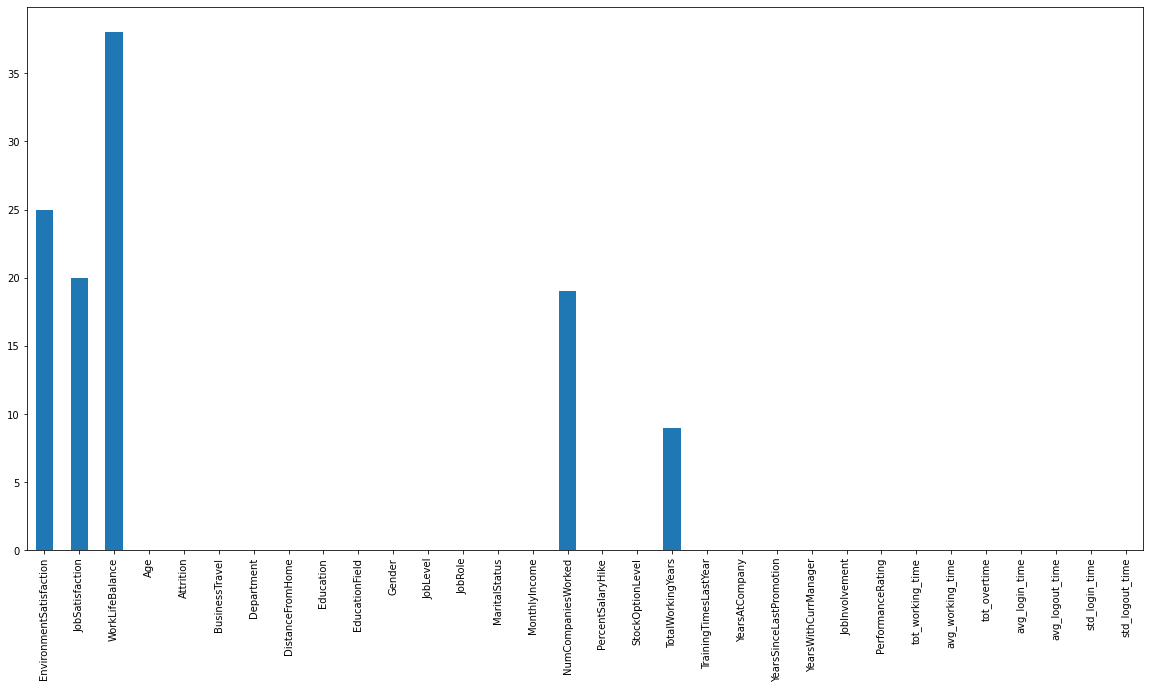

In [32]:
(data.isnull().sum()).plot.bar(figsize=(20,10))

**As we can observe from the graph above, missing values exists in the following features in the dataset :**  

In [33]:
null_containing_features = data.columns[data.isnull().any()]
data[null_containing_features].isnull().sum()

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
NumCompaniesWorked         19
TotalWorkingYears           9
dtype: int64

**Imoutation of the missing values in our dataset.**

In [34]:
# let's see the range of the features 'NumCompaniesWorked' and 'TotalWorkingYers'
print(data[['NumCompaniesWorked','TotalWorkingYears']].describe())

       NumCompaniesWorked  TotalWorkingYears
count         4391.000000        4401.000000
mean             2.694830          11.279936
std              2.498887           7.782222
min              0.000000           0.000000
25%              1.000000           6.000000
50%              2.000000          10.000000
75%              4.000000          15.000000
max              9.000000          40.000000


In [0]:
'''
For the cases of the features : 
NumCompaniesWorked and TotalWorkingYears,
we are going to use the KNNImputer from sklearn,
to impute the missing values in these features,
as these as primarily numerical features,
representing the experience quotient of an employee,
for which we can produce a higher order approximation,
with insignificant bias introduced to the data.
'''
from sklearn.impute import KNNImputer
# n_neighbors = 5 because of the range of values from (0,9)
data['NumCompaniesWorked'] = KNNImputer(n_neighbors = 5).fit_transform(data['NumCompaniesWorked'].values.reshape(-1,1))
# n_neighbors = 10 because of the range of values from (0,40)
data['TotalWorkingYears'] = KNNImputer(n_neighbors = 10).fit_transform(data['TotalWorkingYears'].values.reshape(-1,1))

In [0]:
'''
For the cases of the features :
EnvironmentSatisfaction, JobSatisfaction and WorkLifeBalance;
we are going to drop the rows containing the null-values in these features,
primarily because these features reflect a qualitative asspect of the employee, represented by numbers;
and if we use any kind of imputation strategies to replace the null-values with some close approximation then,
we won't be able to reflect the qualitative aspect of that feature for that employee,
so it will be a case of miss-representation,
which will inturn introduce unwanted bias in our data, which can lead to a poorer model.
'''
# droping all the rows containing null-values, because at this point on the above mentioned features contain null-values, so the operationwould only impact them
data.dropna(inplace=True)

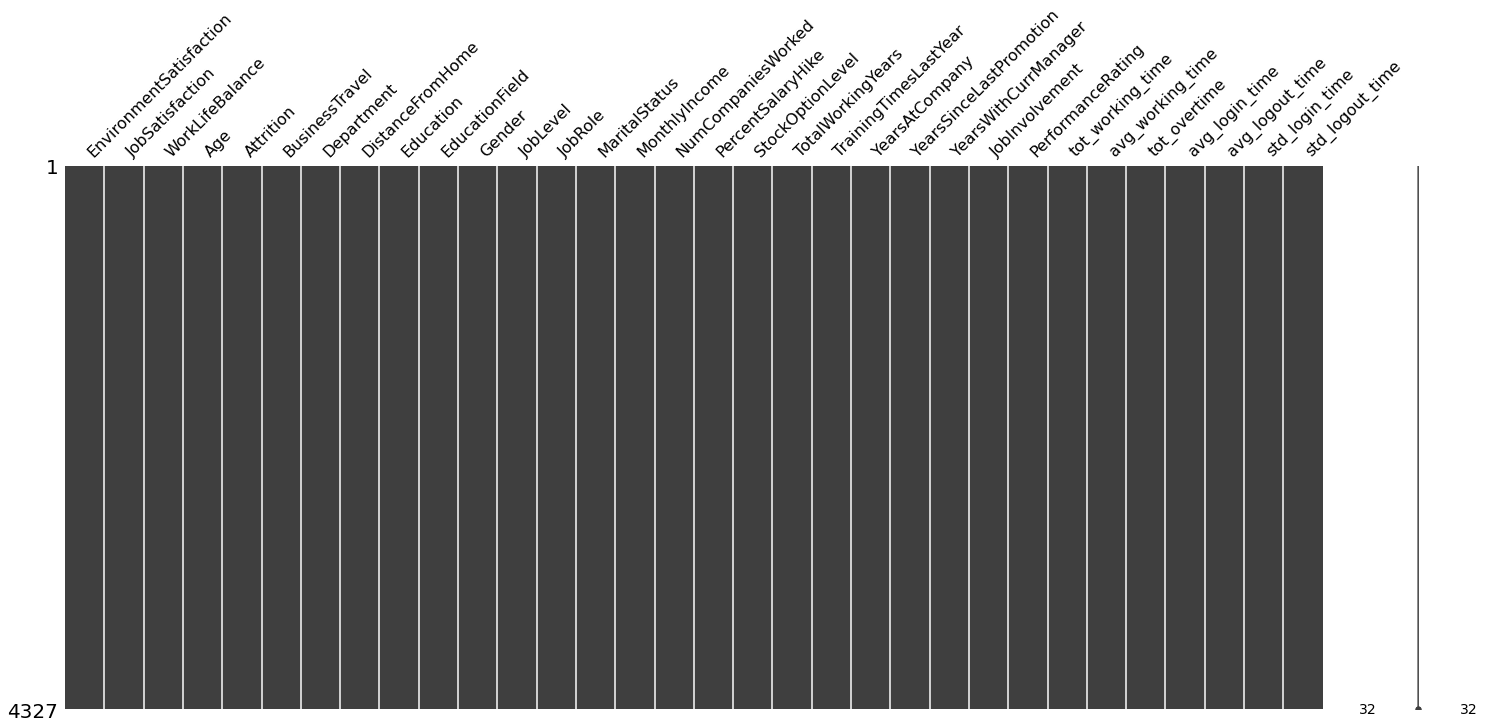

In [37]:
# visealizing the data after handling the missing values.
import missingno as msno
msno.matrix(data)

**As we can see, the data is no more fragmented due to the presence of missing values.**

# Feature exploration and analysis, by utilizing visualizations.

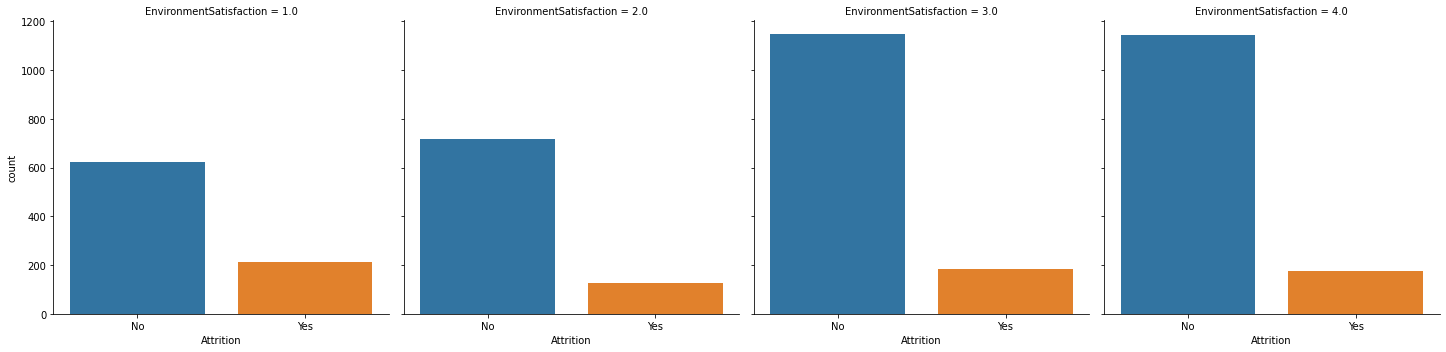

In [38]:
# EnvironmentSatisfaction with Attrition
sns.catplot(x='Attrition', col='EnvironmentSatisfaction', data=data, kind='count')

**We can clearly observe from the above plot that employees who have relatively less work environment satisfaction Level, show a higher level of attrition.**

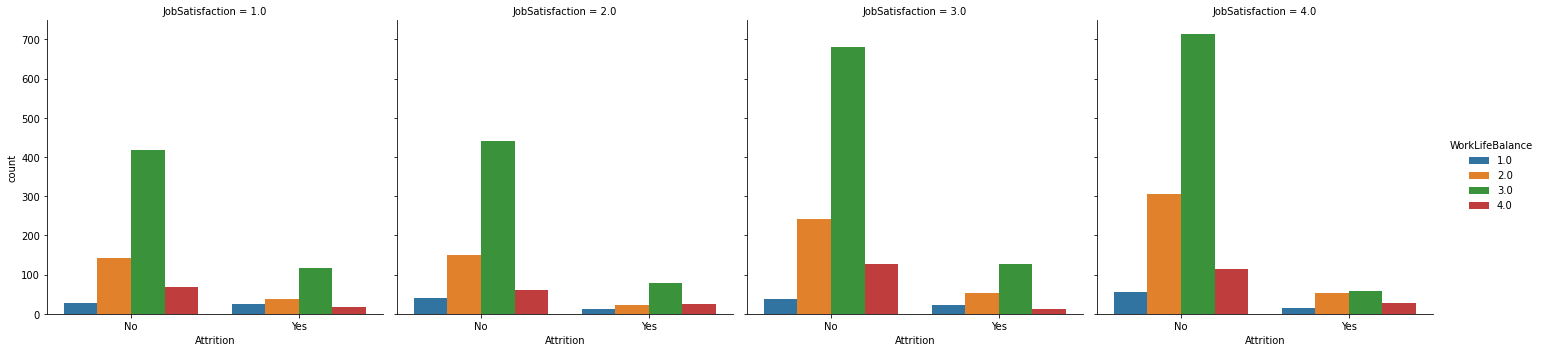

In [39]:
# JobSatisfaction, WorklifeBalance and Attirtion
sns.catplot(x='Attrition', hue='WorkLifeBalance', col='JobSatisfaction', data=data, kind='count')

**We can clearly observe from the above plot that employees with lower job satisfaction and worklife balance levels, show a higher level of attrition.**  
**And employees with higher job satisfaction levels and with a worklife balance score of 3 shower lowest levels of attrition.**

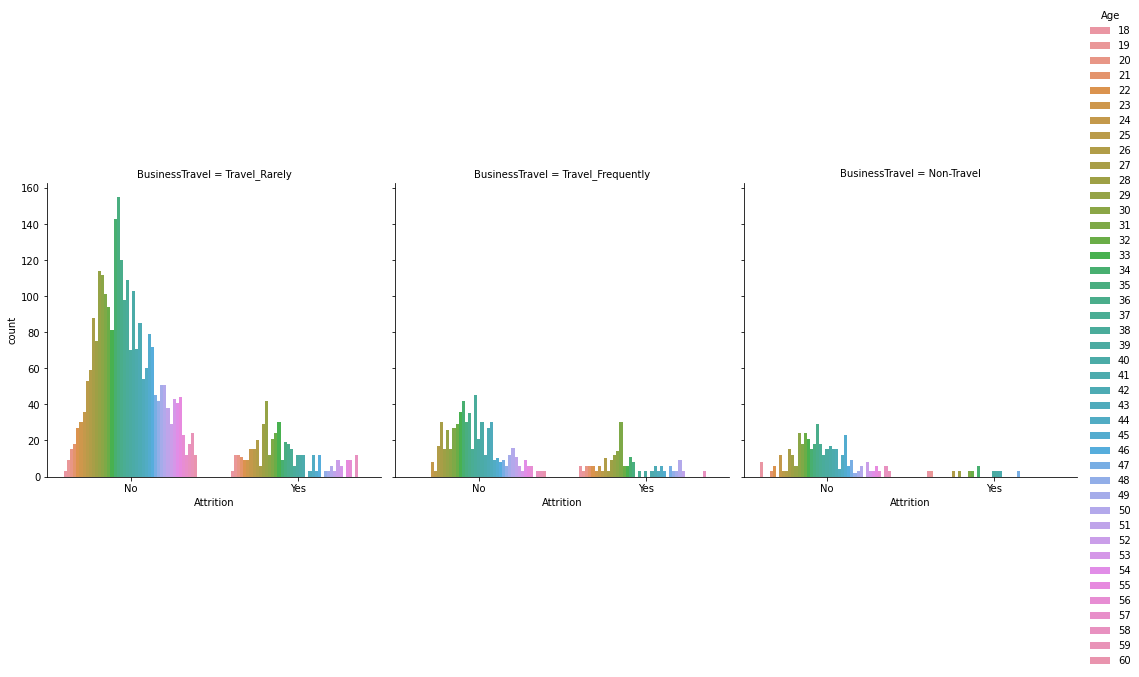

In [40]:
# Age, Businesstravel and Attrition
sns.catplot(x='Attrition', hue = 'Age', col='BusinessTravel', data=data, kind='count')

**We can clearly observe from the above plot that :**  
* employees in the age group of 25 to 35, who travel rarely for business purposes show higher attrition.
* employees in the age group of 25 to 30, who travel frequently for business purposes show relatively higher attrition.
* Attrition in employees who do not travel for business purposes, is almost independent of the age group of those employees, and even so they independently show significantly lower attrition levels. 

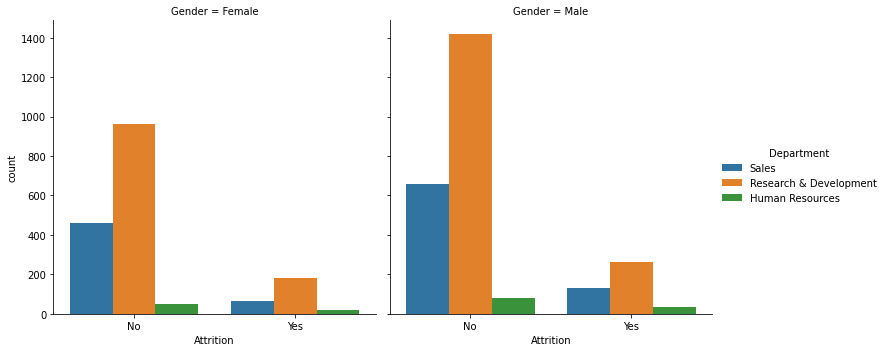

In [41]:
# Department, Gender and Attrition
sns.catplot(x='Attrition', hue= 'Department', col='Gender', data=data, kind='count')

**We can clearly infer from the above plot that employees, in the Research & Development for both the cases of the genders, show a relatively higher level of attrition, than the other departments in the company.**  
**In the case of the Sales and Human Resources departments, male employees show a higher attition level than female employees.**

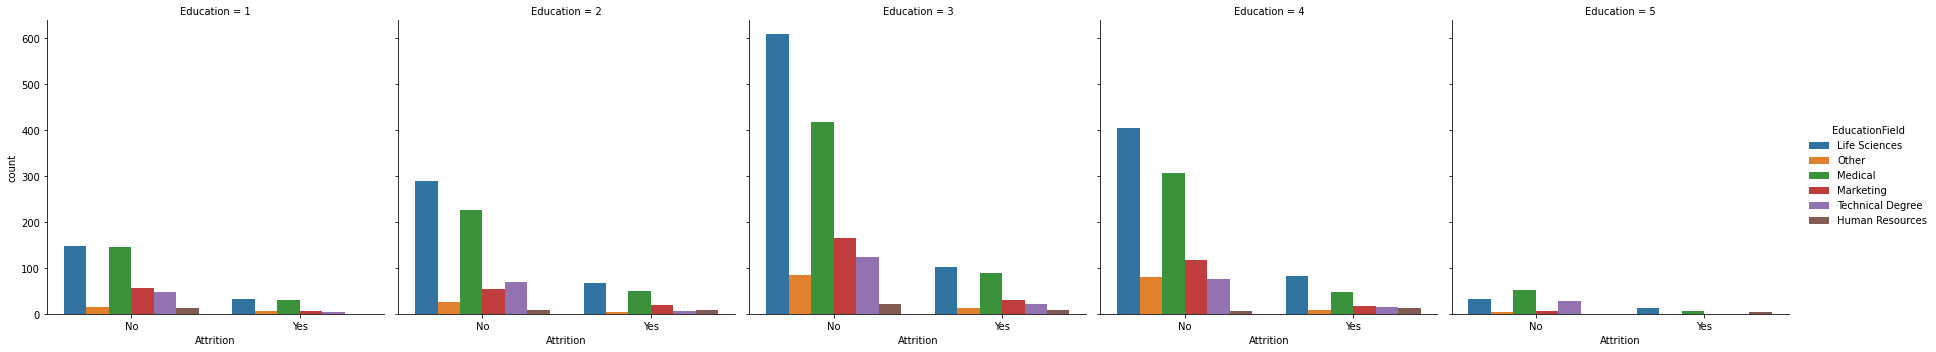

In [42]:
# Education, EducatoinField and Attrition
sns.catplot(x='Attrition', hue= 'EducationField', col='Education', data=data, kind='count')

**We can infer from the above plot that employees with an education of type 4, in the field of LIfe Sciences, show the relatively higher levels of attition.**
**We can also see that emplyees with an education type of 3, in the field of Life Sciences and Medical, also show simialar high levels of attrition among their peers.** 

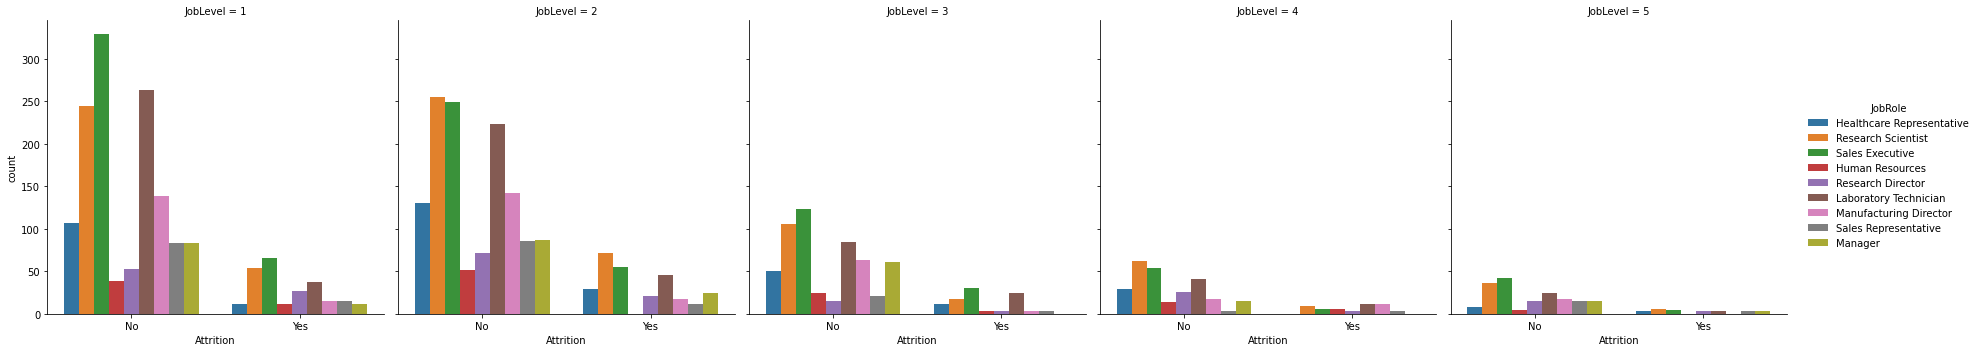

In [43]:
# JobLevel JobRole
sns.catplot(x='Attrition', hue= 'JobRole', col='JobLevel', data=data, kind='count')

**We can infer from the above plot that employees in the job level category 1 and 2, with a role of Sales Executive and Research Scientist, show the relatively highest levels of attrition.**  
**There is also a significant level of attirtion by the employees with a role of Laboratory Technicians in the job level category 1, 2 and 4.**

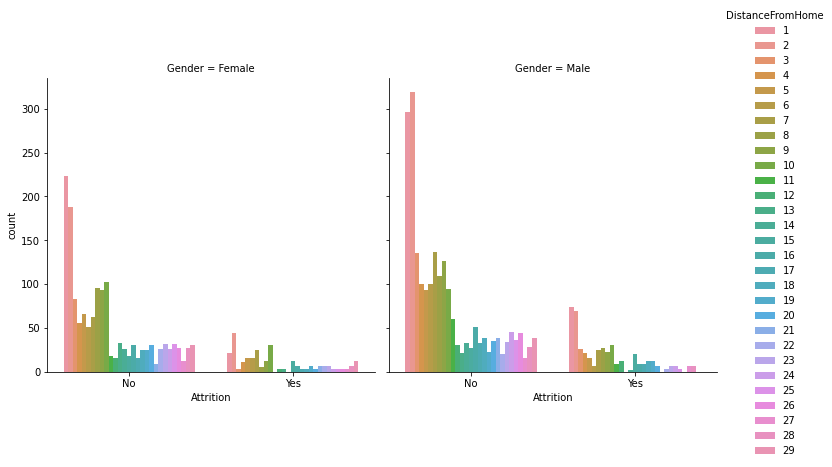

In [44]:
# DistanceFromHome Gender
sns.catplot(x='Attrition', hue= 'DistanceFromHome', col='Gender', data=data, kind='count')

**We can clearly observe from the above plot that, the attrition level for boht male and female employees are relatively higher in the cases where the distance to the office from their homes are smaller; and as the distance of the office from their homes increases, we can observe a decrease in the levels of attrition in them.**

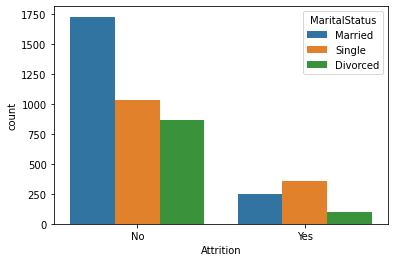

In [45]:
# MaritalStatus and Attrition
sns.countplot(x='Attrition', hue= 'MaritalStatus', data=data)

**we can clearly observe from the above pot that the attrition level is relatively high in the employees with a marital status of Single, following that are the employees with marital status of Married; and the employees with the reltively lowest level of attrition are the ones with a marital status of Divorced.**

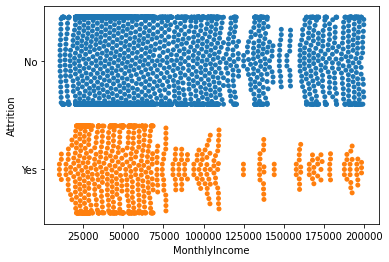

In [46]:
# MonthlyIncome and Attrition
sns.swarmplot(x='MonthlyIncome', y= 'Attrition', data=data)

**We can clearly observe from the above plot that a lot of attritions happening in the workforce of the company is related to the employees with income ranging from 25000 to 75000 rupeesper month.**

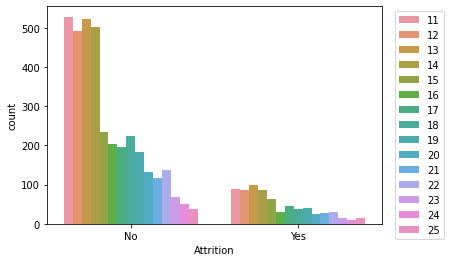

In [47]:
# PercentSalaryHike and Attrition
sns.countplot(x='Attrition', hue= 'PercentSalaryHike', data=data)
plt.legend(bbox_to_anchor=(1.2,1.), loc="upper right")

**We can observe from the above plot that employees who received a salary hike of precentages ranging from 11% to 15%, show a relatively higher attrition.**  
**On the other side, as we observe percentage of salary hike increasing, we see a decrease in the attition of those employees.**

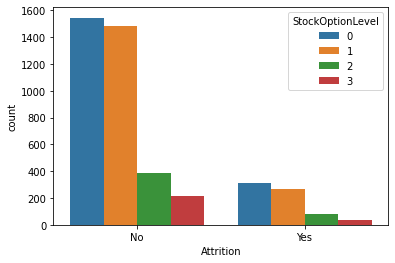

In [48]:
# StockOptionLevel and Attrition
sns.countplot(x='Attrition', hue= 'StockOptionLevel', data=data)

**We can clearly see from the above plot that the level of stock options with the employees and the attrition level of the employees is inversely proportionate; i.e. as the stock option level with an employee rises, they start showing lower levels of attirion.**

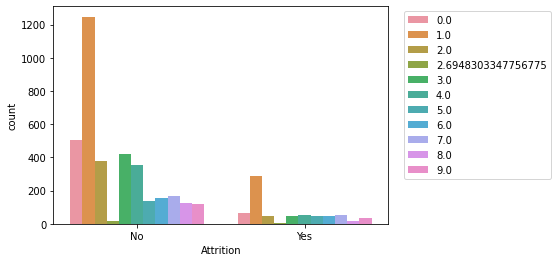

In [49]:
# NumCompaniesWorked and Attrition
sns.countplot(x='Attrition', hue= 'NumCompaniesWorked', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can clearly infer from the above plot that employees who have worked with only 1 company show the highest attirition behaviour than the rest of the employees who have worked with more than 1 companies.**

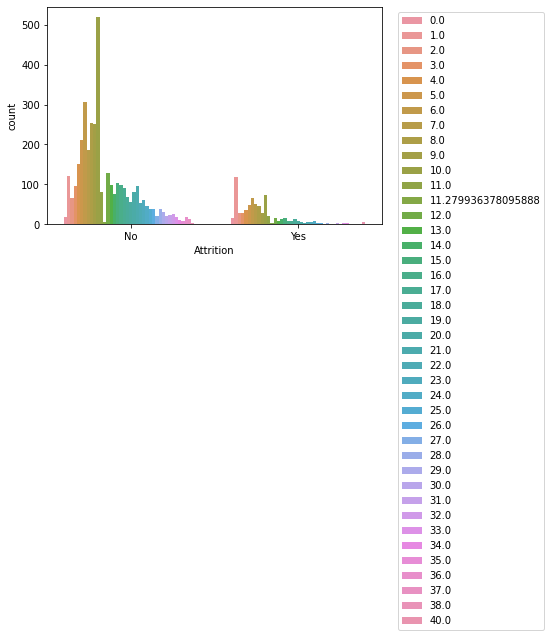

In [50]:
# TotalWorkingYears and Attrition
sns.countplot(x='Attrition', hue= 'TotalWorkingYears', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can infer from the above plot that as the experience of the employees increase, the attrition levels drop in the company; and specially the employees with an experience in the ranges of 0 to 2 years and 10 to 11 years show relatively higher attrition levels than ther peers.**

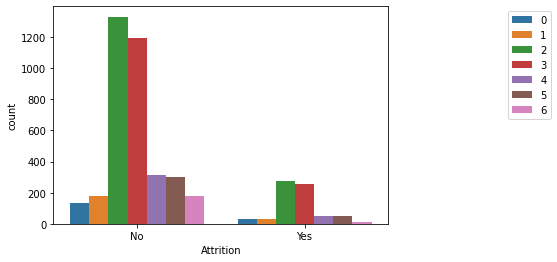

In [51]:
# TrainingTimesLastYear and Attrition
sns.countplot(x='Attrition', hue= 'TrainingTimesLastYear', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can clearly see from the above plot that employees who got 2 and 3 times training last year show the most attrition behaviour among their peers.** 

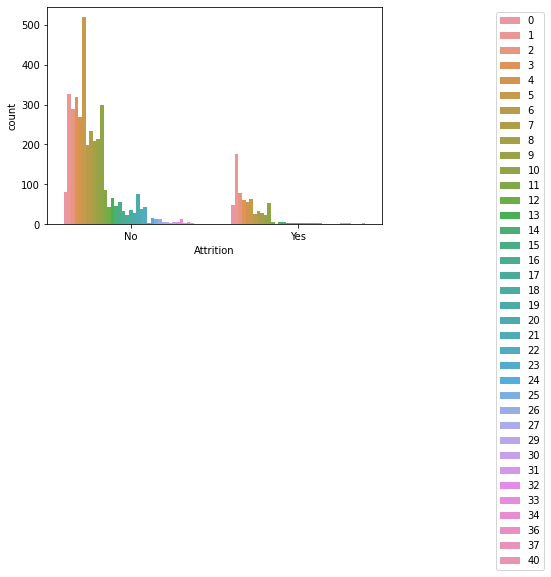

In [52]:
# YearsAtCompany and Attrition
sns.countplot(x='Attrition', hue= 'YearsAtCompany', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can clearly observe from the above plot that newer employees show higher attrition behaviour, and as the employees get more seasoned in the company they show lower attrition behaviour.**

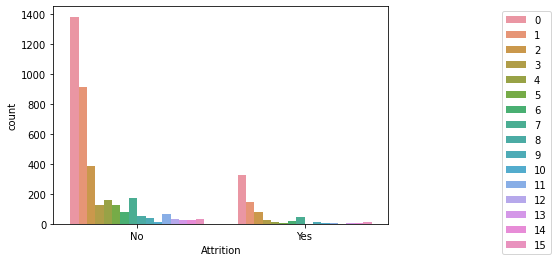

In [53]:
# YearsSinceLastPromotion and Attrition 
sns.countplot(x='Attrition', hue= 'YearsSinceLastPromotion', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can clearly see from the above plot that employees with a recent promotion in the company show higher attrition behaviour than the employees who received their current promotion relatively earlier than their peers.**

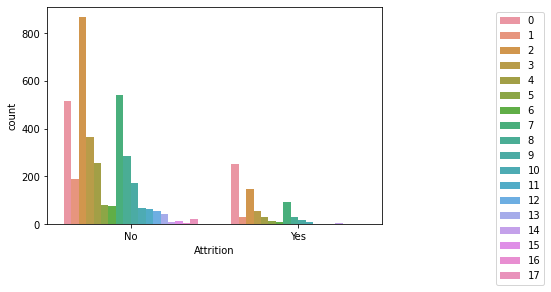

In [54]:
# YearsWithCurrManager and Attrition
sns.countplot(x='Attrition', hue= 'YearsWithCurrManager', data=data)
plt.legend(bbox_to_anchor=(1.5,1), loc="upper right")

**We can clearly observe from the above plot that employees that are with their current manager for higher number of years show higher attrition behaviour than their peers, and the attrition behaviour decreases as the employees stay with their current managers for longre periods of time.**

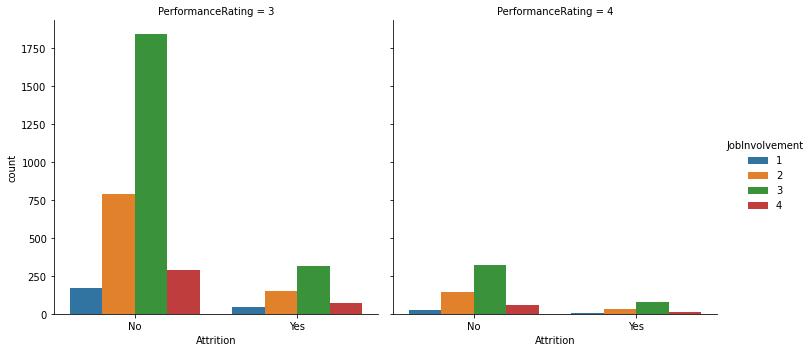

In [55]:
# JobInvolvement PerformanceRating
sns.catplot(x='Attrition', hue= 'JobInvolvement', col='PerformanceRating', data=data, kind='count')

**We can clearly observe from the above plot that employees with a performance rating of 3 and a job involvement score of 3 show the relatively highest attrition among their peers.**  
**This is also applicable for employees with a performance rating of 4 and job involvement score of 3, i.e. they also show a relatively higher attrition, but not the highet among their peers.**

# Feature encoding and scalling.

In [0]:
from sklearn.preprocessing import (KBinsDiscretizer,
                                   Binarizer,
                                   MinMaxScaler,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   OneHotEncoder)

In [0]:
# Ordinal encoding the feature 'tot_working_time' into discreete 10 bins using the 'quantile' strategy.
data['tot_working_time'] = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit_transform(data['tot_working_time'].values.reshape(-1,1))
# Scalling the feature classes in the range of (0, 1)
data['tot_working_time'] = MinMaxScaler().fit_transform(data['tot_working_time'].values.reshape(-1, 1))

In [0]:
'''
Binary encoding the features 'avg_login_time' and 'avg_logout_time', mapping to the following :

***'avg_login_time'***
  0 > denoting EARLY and ON-TIME average login time of the employee through the year
  1 > denoting LATE average login time of the employee through the year

***'avg_logout_time'***
  0 > denoting EARLY average logout time of the employee throught the year
  1 > denoting ON-TIME and OVER-TIME average logout time of the employee through the year
'''
data['avg_login_time'] = Binarizer(threshold=10.00).fit_transform(data['avg_login_time'].values.reshape(-1,1))
data['avg_logout_time'] = Binarizer(threshold=17.99).fit_transform(data['avg_logout_time'].values.reshape(-1,1))

In [0]:
# Scalling the feature 'avg_working_time' in the range of (0, 1)
data['avg_working_time'] = MinMaxScaler().fit_transform(data['avg_working_time'].values.reshape(-1, 1))

**Let's visualize the class counts in the features of our data.**

In [0]:
# classes = pd.DataFrame()
# temp_drop_col = ['MonthlyIncome','avg_working_time', 'tot_overtime']
# temp_data = data.drop(temp_drop_col, axis=1, inplace=False)
# for col in data.columns:
#   classes.loc[0, col] = len(temp_data[col].value_counts())
# classes = classes.T
# # print(classes.shape, type(classes), classes.columns)
# classes.rename(columns={0:'n_classes'}, inplace=True)
# # print(classes.columns)
# # classes['n_classes'] = MinMaxScaler().fit_transform(classes['n_classes'].values.reshape(-1,1))
# classes.plot.bar(figsize=(20,10))